# Derivatives of model functions
This notebook provides the derivatives of the mode functions used for fitting in this project.
The derivatives can be used for calculating the jacobian of the objective function during fitting.
The derivatives are symbolically calculated using `sympy`.

In [1]:
import sympy as sy
sy.init_printing()

## Define symbols and shortcuts

In [2]:
t, t0, ktl, km, delta, beta, off = sy.symbols(("t", "t_0", r"k_\text{tl}", r"k_\text{m}", r"\delta", r"\beta", "o"), real=True)

In [3]:
t, t0, ktl, km, delta, beta, off

## Define twostage model function

* without absolute values

In [4]:
dmb = delta - beta
dt = t - t0

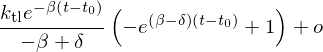

In [5]:
f2 = off + ( ktl / dmb * (1 - sy.exp(- dmb * dt)) * sy.exp(-beta * dt) )
f2

* with absolute values

In [ ]:
dmb = sy.Abs(delta) - sy.Abs(beta)
dt = t - sy.Abs(t0)

In [ ]:
f2 = off + ( sy.Abs(ktl) / dmb * (1 - sy.exp(- dmb * dt)) * sy.exp(-sy.Abs(beta) * dt) )
f2

* piecewise

In [ ]:
f2 = sy.Piecewise((f2, f2 > 0), (off, True))
f2

## Derive twostage model function

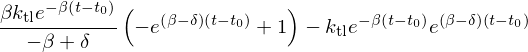

In [6]:
# Derive w.r.t. t0
sy.diff(f2, t0)

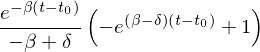

In [7]:
# Derive w.r.t. ktl
sy.diff(f2, ktl)

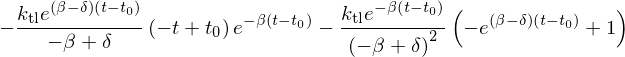

In [8]:
# Derive w.r.t. delta
sy.diff(f2, delta)

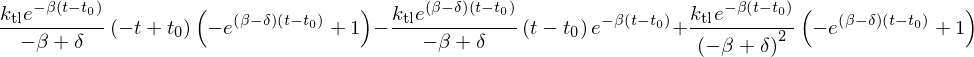

In [9]:
# Derive w.r.t. beta
sy.diff(f2, beta)

In [10]:
# Derive w.r.t. off
sy.diff(f2, off)

## Define threestage function

In [11]:
dmb = delta - beta
bkm = beta + km
dmbk = delta - bkm
dt = t - t0

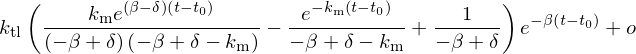

In [12]:
f3 = 1 / dmb + km * sy.exp(-dmb * dt) / dmb / dmbk - sy.exp(-km * dt) / dmbk
f3 *= ktl * sy.exp(-beta * dt)
f3 += off
f3

## Derive threestage model function

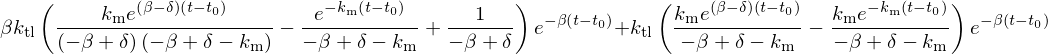

In [13]:
# Derive w.r.t. t0
sy.diff(f3, t0)

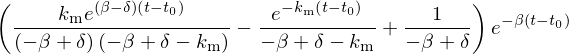

In [14]:
# Derive w.r.t. ktl
sy.diff(f3, ktl)

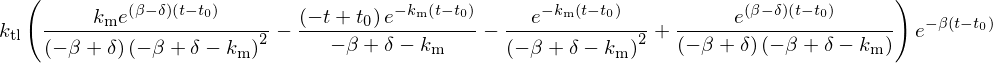

In [15]:
# Derive w.r.t. km
sy.diff(f3, km)

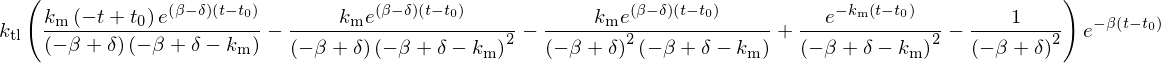

In [16]:
# Derive w.r.t. delta
sy.diff(f3, delta)

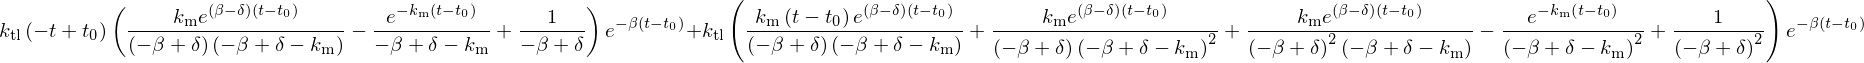

In [17]:
# Derive w.r.t. beta
sy.diff(f3, beta)

In [18]:
# Derive w.r.t. off
sy.diff(f3, off)